# 3.1 Problem - 1A - Single Year HDI Exploration

Task:

1. Extract Latest Year

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/HDI_Assignment/Human_Development_Index_Dataset.csv",
                 encoding='latin1')
# Identify unique years
df['year'].unique()




array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
# Filter for year 2022
hdi_2022_df = df[df['year'] == 2022].copy()

# Save for further use
hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)

hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


2. Data Exploration:

In [14]:
#Task2
hdi_2022_df.shape
hdi_2022_df.dtypes


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


3. Missing Values & Data Cleaning:

In [ ]:
# Report missing values before cleaning
print("Initial Missing Values:\n", hdi_2022_df.isnull().sum())

# Replace special characters and non-numeric symbols
hdi_2022_df.replace(["NA", "–", "-"], np.nan, inplace=True)

# Convert numeric columns stored as text
numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap']
for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# Remove duplicates
hdi_2022_df.drop_duplicates(inplace=True)

# Handle missing values: Drop rows where 'hdi' is null
# Justification: HDI is the primary metric; without it, the row is unusable for this analysis.
hdi_2022_df.dropna(subset=['hdi'], inplace=True)

Initial Missing Values:
 Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64


4. Basic Statistics:

In [ ]:
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), 'country']
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), 'country']

print(f"Mean: {mean_hdi}, Median: {median_hdi}, Std Dev: {std_hdi}")
print(f"Highest HDI: {highest_hdi_country}, Lowest HDI: {lowest_hdi_country}")

Mean: 0.7228872549019609, Median: 0.7395, Std Dev: 0.15302880386427825
Highest HDI: Switzerland, Lowest HDI: Somalia


5. Filtering and Sorting:

In [15]:
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.8]

high_hdi_sorted = high_hdi.sort_values(by='gross_inc_percap', ascending=False)

high_hdi_sorted.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


6. Adding HDI Category Column:

In [21]:
def categorize_hdi(hdi):
    if hdi < 0.55:
        return "Low"
    elif hdi < 0.7:
        return "Medium"
    elif hdi < 0.8:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

hdi_2022_df[['country','hdi','HDI_Category']].head()

,country,hdi,HDI_Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium


In [22]:
# Save final CSV
save_path = "/content/drive/MyDrive/HDI_Assignment"
hdi_2022_df.to_csv(save_path + "/HDI_2022.csv", index=False)

## Problem 1B: HDI Trend Analysis

Task:

1. Data Extraction and Saving:

In [23]:

hdi_2020_2022 = df[df['year'].isin([2020,2021,2022])].copy()

hdi_2020_2022.to_csv(save_path + "HDI_problem1B.csv", index=False)
hdi_2020_2022.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


2. Data Cleaning:

In [24]:
print(f'There are {hdi_2020_2022["hdi"].isna().sum()} missing values in hdi column.')
print(f'There are {hdi_2020_2022["country"].isna().sum()} missing values in country column.')
print(f'There are {hdi_2020_2022["year"].isna().sum()} missing values in year column.\n')

print(f"There are {hdi_2020_2022.isnull().sum().sum()} missing or null values.")
print(f"There are {hdi_2020_2022.duplicated().sum()} duplicate rows.")
print(f"There are {sum((hdi_2020_2022.isin(['-','NA','N/A'])).sum())} values with special characters such as '-' representing missing data.")

row_count_og=len(hdi_2020_2022)
hdi_2020_2022=hdi_2020_2022.dropna()
row_count_new=len(hdi_2020_2022)
print(row_count_og-row_count_new," rows with empty values dropped.")


There are 8 missing values in hdi column.
There are 0 missing values in country column.
There are 0 missing values in year column.

There are 662 missing or null values.
There are 0 duplicate rows.
There are 0 values with special characters such as '-' representing missing data.
146  rows with empty values dropped.


3. Visualization Tasks:

 A. Line Chart — HDI Trend (Country-Level):

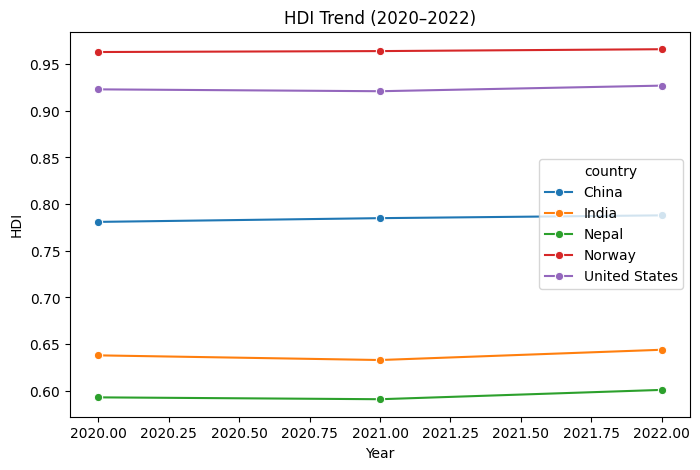

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

countries = ['Nepal','India','China','United States','Norway']
trend = hdi_2020_2022[hdi_2020_2022['country'].isin(countries)]

plt.figure(figsize=(8,5))
sns.lineplot(data=trend, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

B.1 Bar Chart: Average HDI by Region (2020–2022)

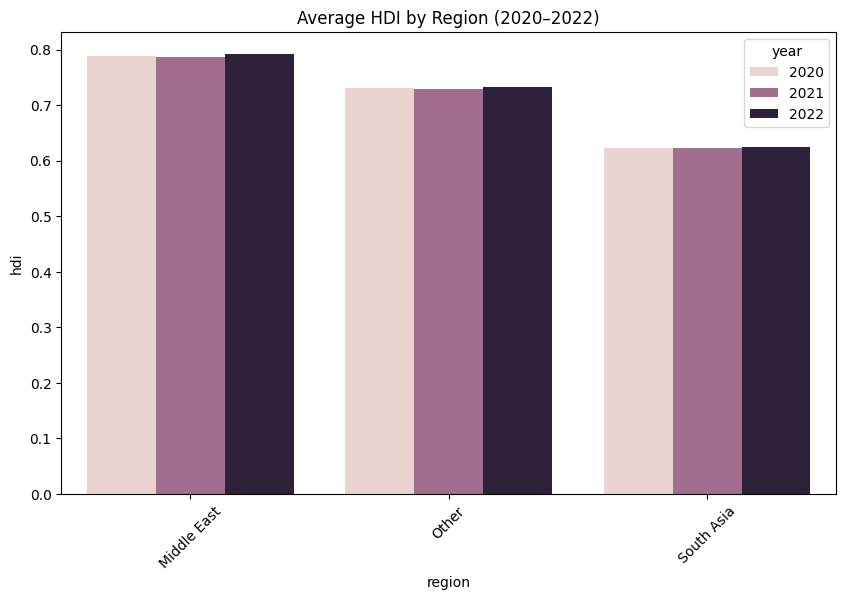

In [26]:
sa_list = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
me_list = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
           "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

def assign_region(country):
    if country in sa_list:
        return 'South Asia'
    elif country in me_list:
        return 'Middle East'
    else:
        return 'Other'

hdi_2020_2022['region'] = hdi_2020_2022['country'].apply(assign_region)

region_avg = hdi_2020_2022.groupby(['region','year'])['hdi'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=45)
plt.show()


B.2 Box Plot: HDI Distribution for 2020, 2021, and 2022

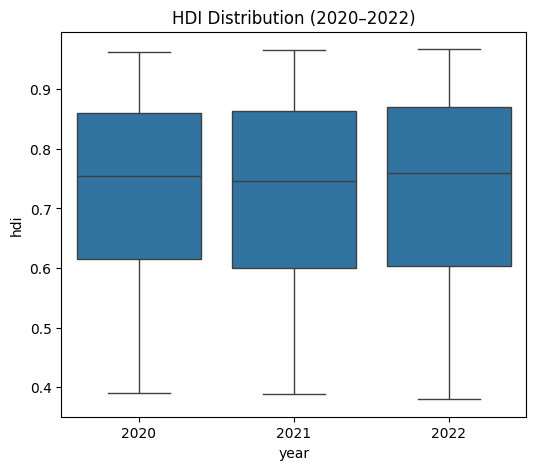

In [27]:
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_2020_2022, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.show()


B.3 Scatter Plot: HDI vs. GNI per Capita

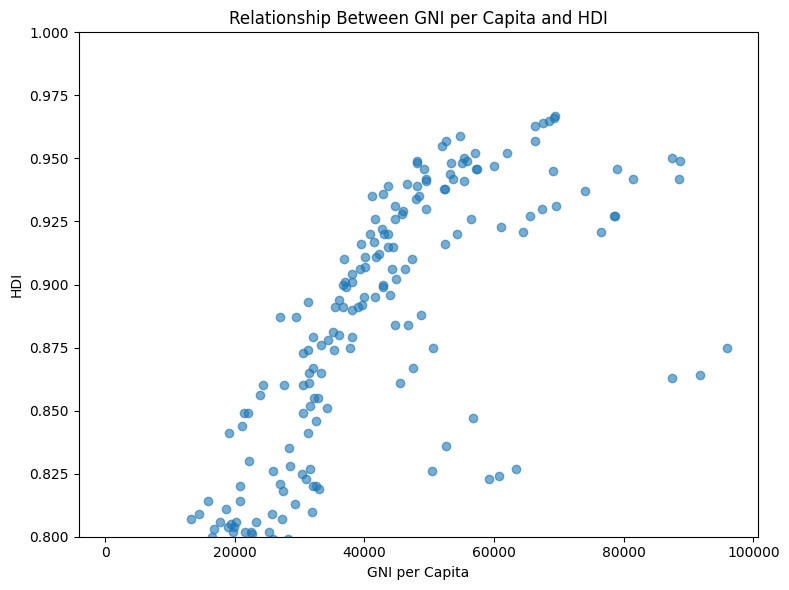

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

if "gross_inc_percap" in hdi_2020_2022.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(hdi_2020_2022["gross_inc_percap"],hdi_2020_2022["hdi"],alpha=0.6)
    plt.title("Relationship Between GNI per Capita and HDI")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.ylim(0.8,1)
    plt.tight_layout()
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")

In [29]:
hdi_2020_2022.groupby('country')['hdi'].agg(['first','last']).assign(Change=lambda x: x['last']-x['first']).sort_values('Change', ascending=False).head()


,first,last,Change
country,,,
Azerbaijan,0.722,0.760,0.038
Ecuador,0.734,0.765,0.031
Mexico,0.757,0.781,0.024
Tajikistan,0.656,0.679,0.023
Bahamas,0.798,0.820,0.022


In [30]:
# Save final CSV
save_path = "/content/drive/MyDrive/HDI_Assignment"
hdi_2020_2022.to_csv(save_path + "/HDI_problem1B.csv", index=False)

#  Problem 2 Advanced HDI Exploration

Task:

1. Create South Asia Subset:

In [31]:
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

hdi_south_asia = df[df["country"].isin(south_asia_countries)].copy()

hdi_south_asia.to_csv("/content/drive/MyDrive/HDI_Assignment/HDI_SouthAsia.csv", index=False)
print("New dataset successfully created.")

New dataset successfully created.


2. Composite Development Score

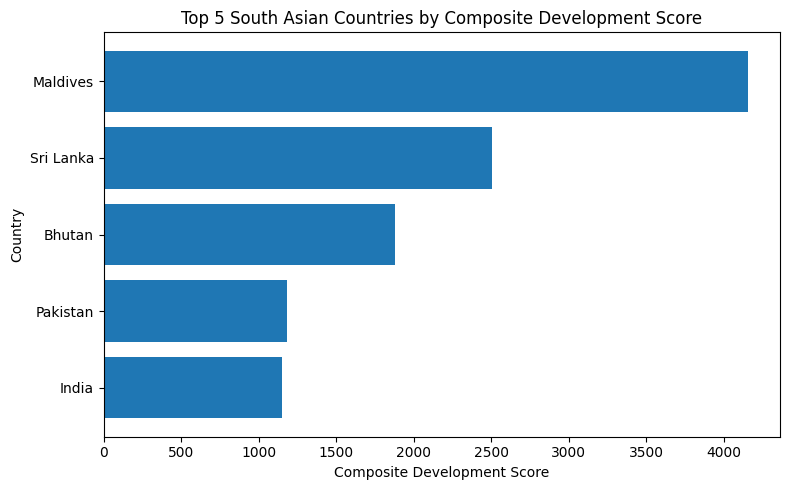

In [32]:
hdi_south_asia["Composite_Score"] = (
    0.30 * hdi_south_asia["life_expectancy"] +
    0.30 * hdi_south_asia["gross_inc_percap"]
)

country_composite = (
    hdi_south_asia.groupby("country", as_index=False)
    .agg({"Composite_Score": "mean", "hdi": "mean"})
)

composite_ranking = country_composite.sort_values(by="Composite_Score", ascending=False)
top5 = composite_ranking.head(5)

plt.figure(figsize=(8,5))
plt.barh(top5["country"], top5["Composite_Score"])
plt.xlabel("Composite Development Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Development Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

3. Outlier Detection:

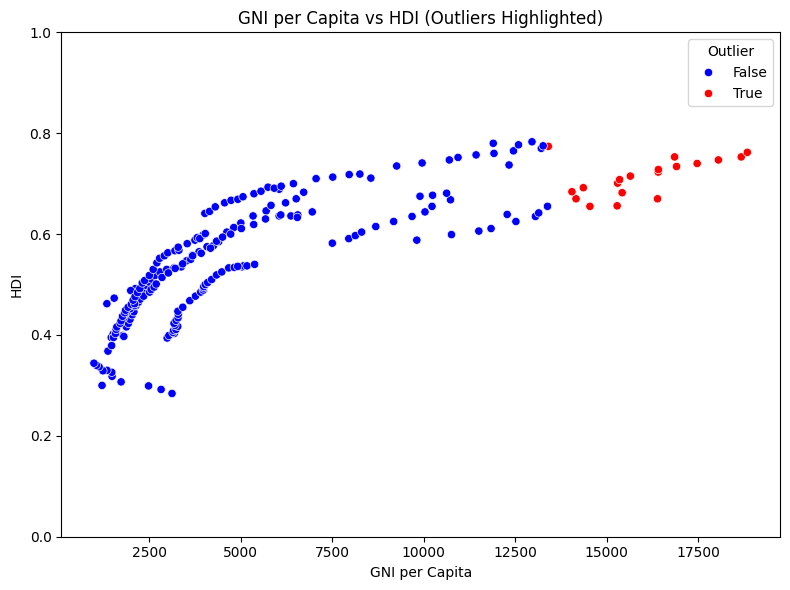

In [33]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

hdi_south_asia["HDI_outlier"] = detect_outliers(hdi_south_asia["hdi"])
hdi_south_asia["GNI_outlier"] = detect_outliers(hdi_south_asia["gross_inc_percap"])
hdi_south_asia["Outlier"] = hdi_south_asia["HDI_outlier"] | hdi_south_asia["GNI_outlier"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=hdi_south_asia,
    x="gross_inc_percap",
    y="hdi",
    hue="Outlier",
    palette={False: "blue", True: "red"}
)
plt.title("GNI per Capita vs HDI (Outliers Highlighted)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


4. Exploring Metric Relationships:

Pearson correlation between gender_development and HDI: 0.866
Pearson correlation between life_expectancy and HDI: 0.959


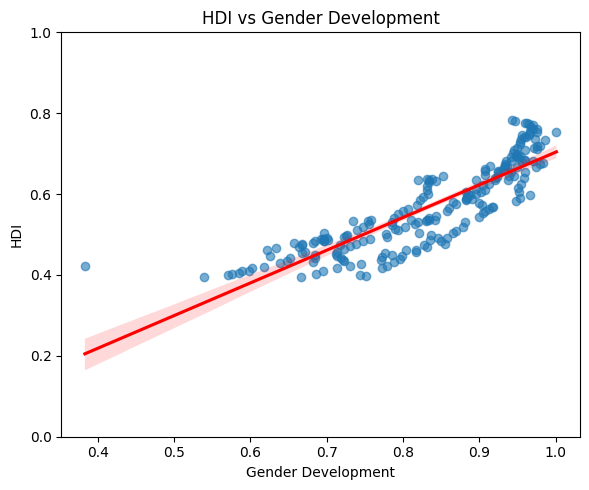

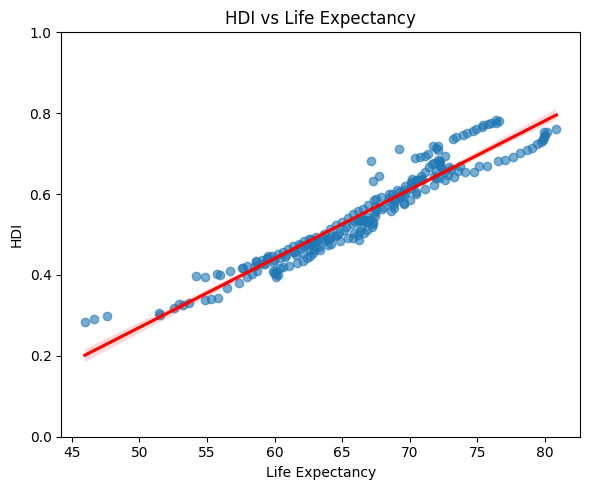

In [34]:
metrics = ["gender_development", "life_expectancy"]

for metric in metrics:
    corr = hdi_south_asia[metric].corr(hdi_south_asia["hdi"])
    print(f"Pearson correlation between {metric} and HDI: {corr:.3f}")

for metric in metrics:
    plt.figure(figsize=(6,5))
    sns.regplot(
        data=hdi_south_asia,
        x=metric,
        y="hdi",
        scatter_kws={"alpha":0.6},
        line_kws={"color":"red"}
    )
    plt.title(f"HDI vs {metric.replace('_', ' ').title()}")
    plt.xlabel(metric.replace("_", " ").title())
    plt.ylabel("HDI")
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

5. Gap Analysis:

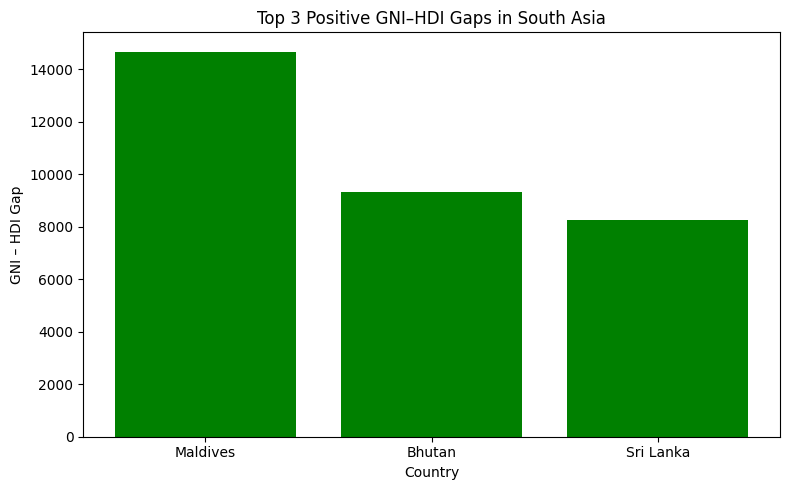

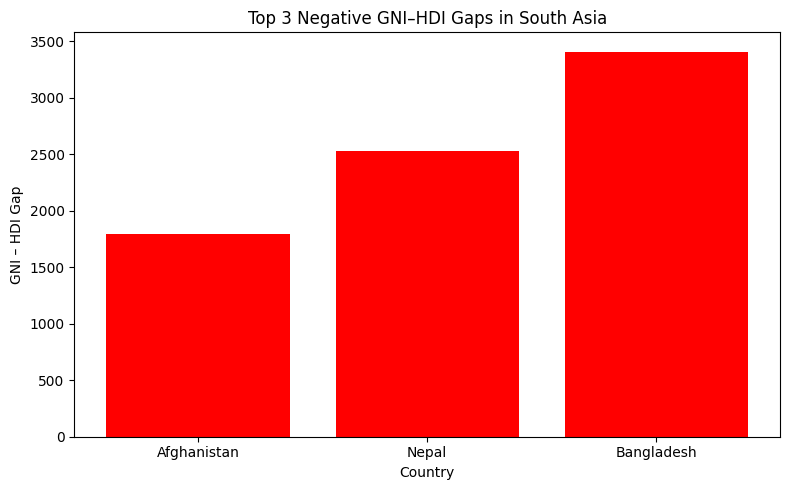

In [35]:
hdi_south_asia = hdi_south_asia.copy()
hdi_south_asia["GNI_HDI_Gap"] = hdi_south_asia["gross_inc_percap"] - hdi_south_asia["hdi"]
gap_summary = hdi_south_asia.groupby("country", as_index=False).agg({
    "GNI_HDI_Gap": "mean"
})

top_positive_gaps = gap_summary.sort_values(by="GNI_HDI_Gap", ascending=False).head(3)
top_negative_gaps = gap_summary.sort_values(by="GNI_HDI_Gap", ascending=True).head(3)

plt.figure(figsize=(8,5))
plt.bar(top_positive_gaps["country"], top_positive_gaps["GNI_HDI_Gap"], color="green")
plt.xlabel("Country")
plt.ylabel("GNI – HDI Gap")
plt.title("Top 3 Positive GNI–HDI Gaps in South Asia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(top_negative_gaps["country"], top_negative_gaps["GNI_HDI_Gap"], color="red")
plt.xlabel("Country")
plt.ylabel("GNI – HDI Gap")
plt.title("Top 3 Negative GNI–HDI Gaps in South Asia")
plt.tight_layout()
plt.show()


# Problem 3 Comparatively Regional Analysis

Task:

1. Create Middle East Subset:

In [36]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
df_2020_2022 = df[df["year"].isin([2020, 2021, 2022])]
df_sa = df_2020_2022[df_2020_2022["country"].isin(south_asia)]
df_me = df_2020_2022[df_2020_2022["country"].isin(middle_east)]
df_sa.to_csv("/content/drive/MyDrive/HDI_Assignment/HDI_SouthAsia_2020_2022.csv", index=False)
df_me.to_csv("/content/drive/MyDrive/HDI_Assignment/HDI_MiddleEast_2020_2022.csv", index=False)
print("South Asia and Middle East subsets saved successfully.")

South Asia and Middle East subsets saved successfully.


2. Descriptive Statistics:

In [40]:
sa_mean, sa_std = df_sa["hdi"].mean(), df_sa["hdi"].std()
me_mean, me_std = df_me["hdi"].mean(), df_me["hdi"].std()
better_region = "South Asia" if sa_mean > me_mean else "Middle East"
print(f"Region performing better on average: {better_region}")
print("South Asia - Mean:", sa_mean, "Std:", sa_std)
print("Middle East - Mean:", me_mean, "Std:", me_std)


Region performing better on average: Middle East
South Asia - Mean: 0.6395833333333333 Std: 0.09827331747496995
Middle East - Mean: 0.7889090909090909 Std: 0.14129476362297624


3. Top and Bottom Performers:

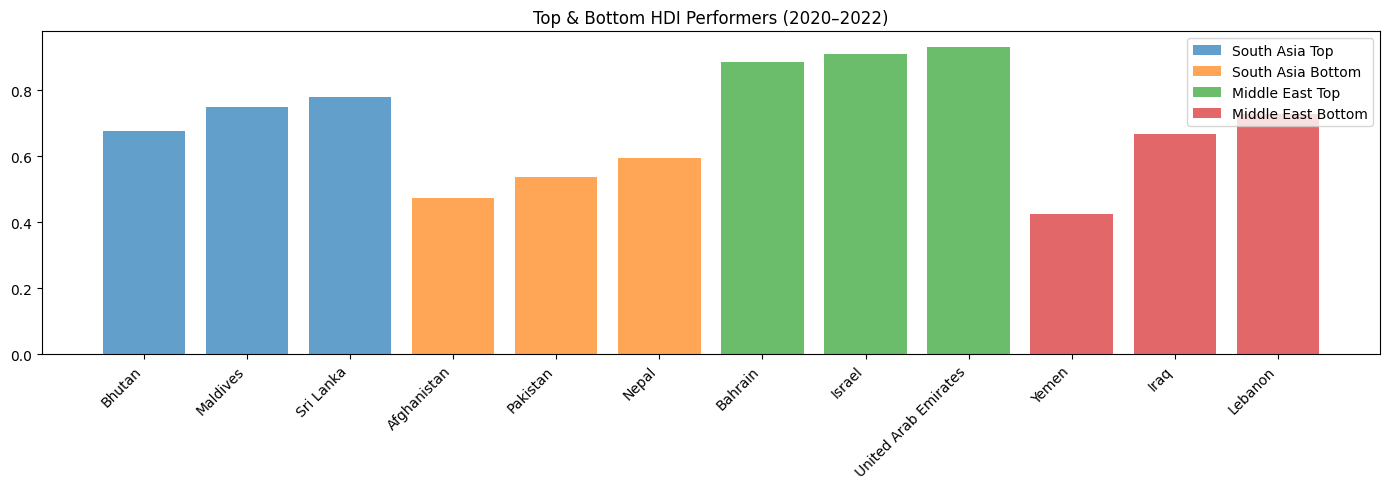

In [44]:
plt.figure(figsize=(14, 5))

plt.bar(sa_top3.index, sa_top3.values, label="South Asia Top", alpha=0.7)
plt.bar(sa_bottom3.index, sa_bottom3.values, label="South Asia Bottom", alpha=0.7)
plt.bar(me_top3.index, me_top3.values, label="Middle East Top", alpha=0.7)
plt.bar(me_bottom3.index, me_bottom3.values, label="Middle East Bottom", alpha=0.7)

plt.xticks(rotation=45, ha="right")   # ← FIX
plt.legend()
plt.title("Top & Bottom HDI Performers (2020–2022)")
plt.tight_layout()
plt.show()

4. Metric Comparisons:

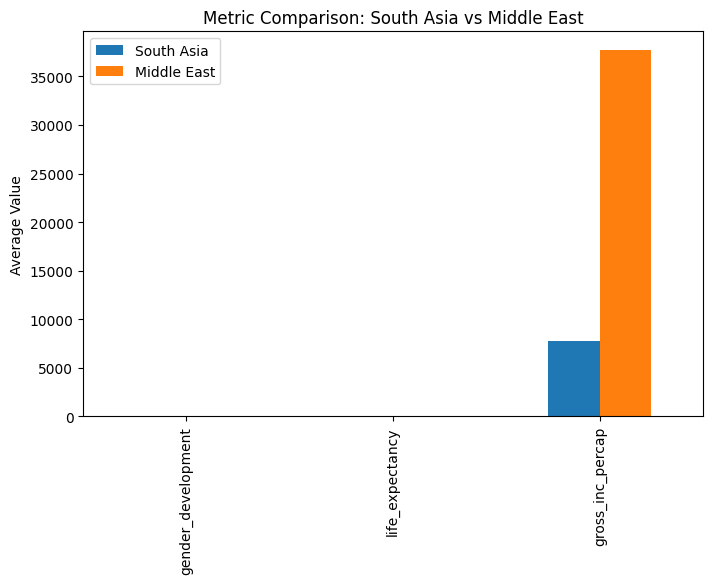

In [ ]:
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

sa_means = df_sa[metrics].mean()
me_means = df_me[metrics].mean()

comparison = pd.DataFrame({
    "South Asia": sa_means,
    "Middle East": me_means
})

comparison.plot(kind="bar", figsize=(8,5))
plt.title("Metric Comparison: South Asia vs Middle East")
plt.ylabel("Average Value")
plt.show()


5. HDI Disparity:

In [ ]:
sa_range = df_sa["hdi"].max() - df_sa["hdi"].min()
me_range = df_me["hdi"].max() - df_me["hdi"].min()

sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

print("South Asia Range:", sa_range, "CV:", sa_cv)
print("Middle East Range:", me_range, "CV:", me_cv)


South Asia Range: 0.321 CV: 0.1536520924690084
Middle East Range: 0.5130000000000001 CV: 0.17910145193048382


6. Correlation Analysis:


South Asia correlations:
gender_development vs HDI: 0.866


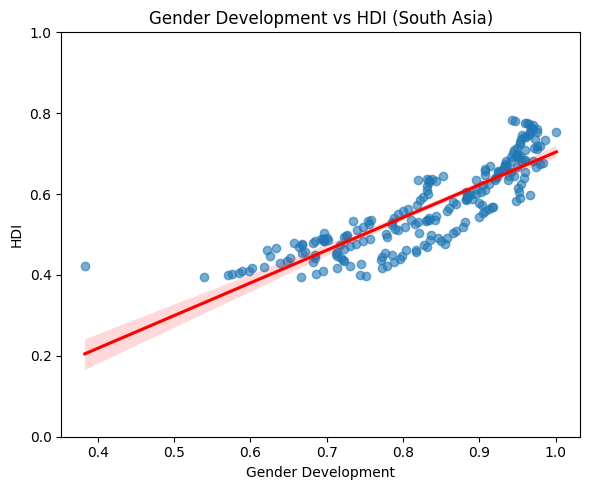

life_expectancy vs HDI: 0.959


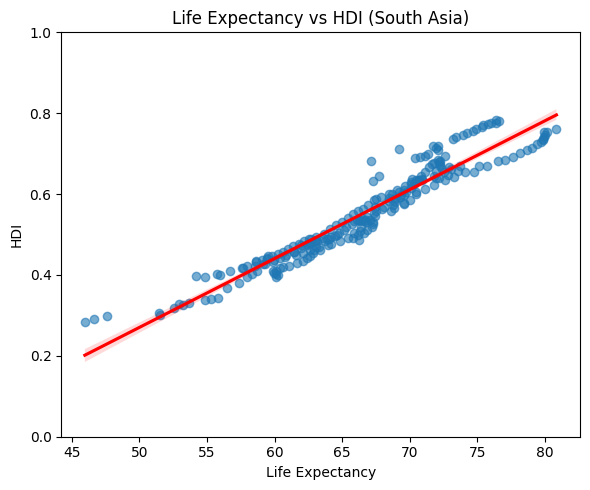


Middle East correlations:
gender_development vs HDI: 0.936


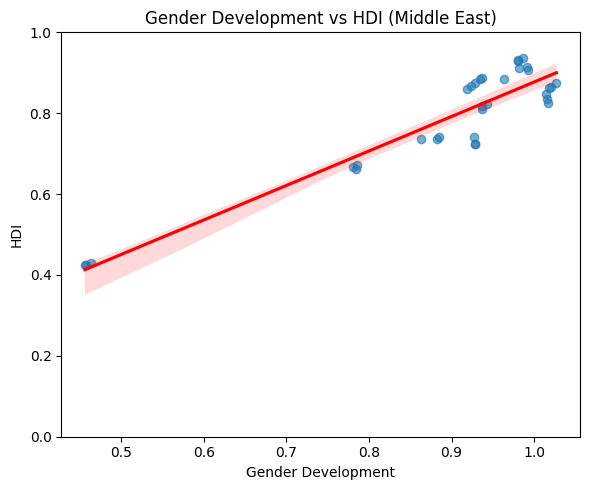

life_expectancy vs HDI: 0.933


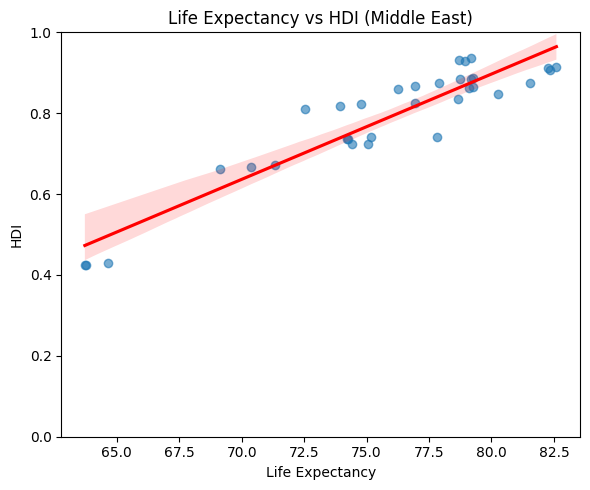

In [ ]:
metrics_corr = ["gender_development", "life_expectancy"]
for region_name, df in [("South Asia", hdi_south_asia), ("Middle East", df_me)]:
    print(f"\n{region_name} correlations:")
    for metric in metrics_corr:
        corr = df[metric].corr(df["hdi"])
        print(f"{metric} vs HDI: {corr:.3f}")

        plt.figure(figsize=(6,5))
        sns.regplot(
            data=df,
            x=metric,
            y="hdi",
            scatter_kws={"alpha":0.6},
            line_kws={"color":"red"}
        )
        plt.title(f"{metric.replace('_',' ').title()} vs HDI ({region_name})")
        plt.xlabel(metric.replace("_"," ").title())
        plt.ylabel("HDI")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.show()

7. Outlier Detection:


South Asia outliers:


,country,year,hdi,gross_inc_percap
3511,Maldives,2003,0.655,14543.14634
3512,Maldives,2004,0.656,15287.20714
3514,Maldives,2006,0.670,16391.40757
3515,Maldives,2007,0.670,14162.42816
3516,Maldives,2008,0.682,15423.81910
3517,Maldives,2009,0.684,14050.92438
3518,Maldives,2010,0.692,14363.23615
3519,Maldives,2011,0.701,15300.31364
3520,Maldives,2012,0.708,15355.44089
3521,Maldives,2013,0.715,15648.36655


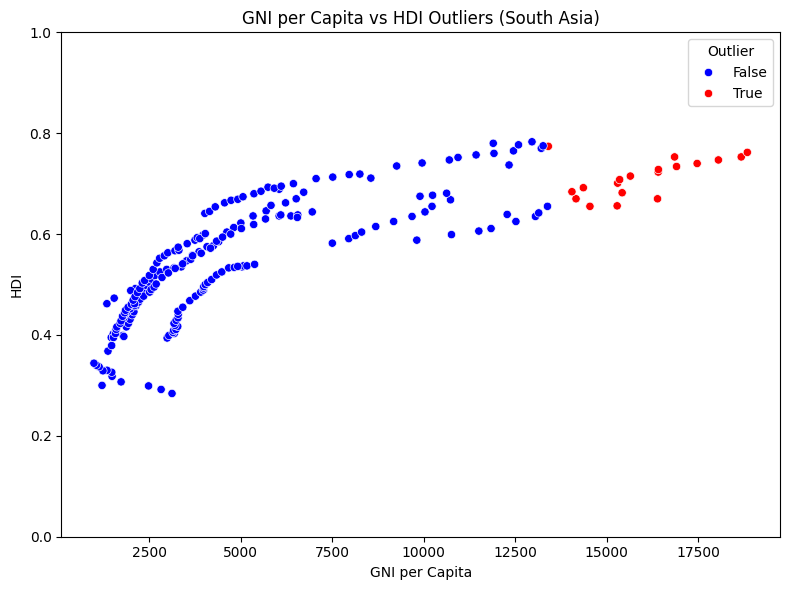


Middle East outliers:


,country,year,hdi,gross_inc_percap
6366,Yemen,2020,0.430,1152.015672
6367,Yemen,2021,0.425,1112.162989
6368,Yemen,2022,0.424,1105.763435


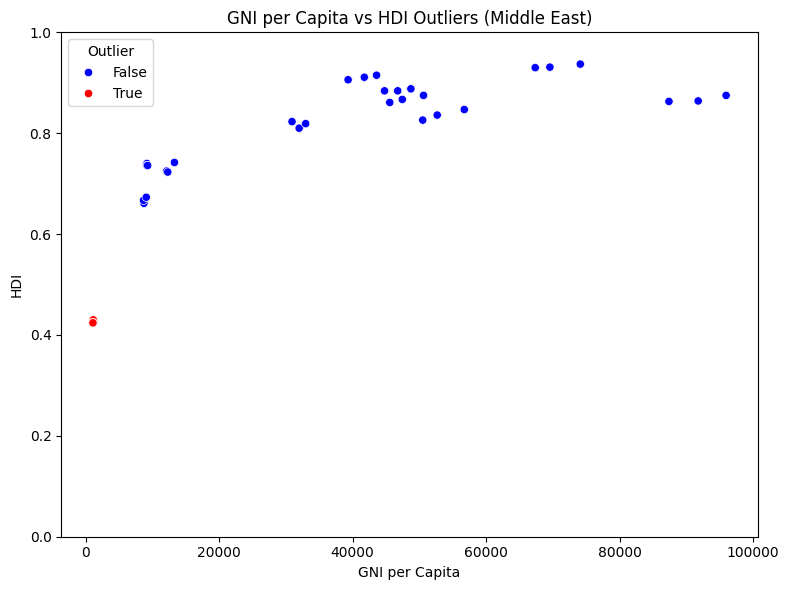

In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return (series < lower) | (series > upper)

for region_name, df in [("South Asia", hdi_south_asia), ("Middle East", df_me)]:
    df = df.copy()
    df["HDI_outlier"] = detect_outliers(df["hdi"])
    df["GNI_outlier"] = detect_outliers(df["gross_inc_percap"])
    df["Outlier"] = df["HDI_outlier"] | df["GNI_outlier"]

    print(f"\n{region_name} outliers:")
    display(df[df["Outlier"]][["country", "year", "hdi", "gross_inc_percap"]])

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="gross_inc_percap", y="hdi", hue="Outlier", palette={False:"blue", True:"red"})
    plt.title(f"GNI per Capita vs HDI Outliers ({region_name})")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()